In [6]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import sys
import math



0.0025963091057832734 2.8603768565515972 0.3080607802666121 6.0493565200241415e-12 0.0003678926544411311
Slope (m): 0.0026 per week
95% CI for slope: (0.0019, 0.0033)
R0 estimate: 1.005
95% CI for R0: (1.004, 1.007)


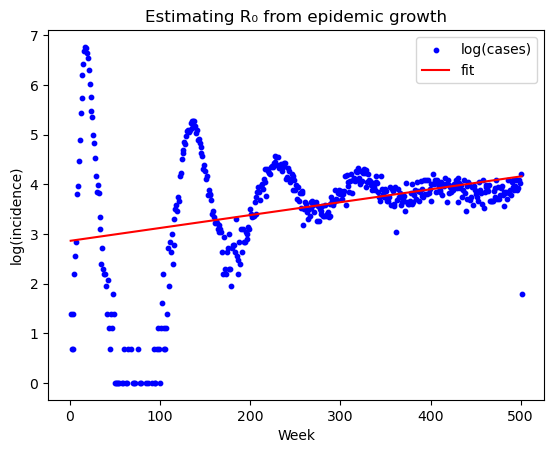

In [2]:
# question 1a

all_weeks_path = Path("data/HW4_all_weeks.csv")
incidence_pd = pd.read_csv(all_weeks_path,delimiter= ",")
df = incidence_pd[incidence_pd["New Cases"] > 0] # need this to acc for inf log values
t = df["Week"].values
I = df["New Cases"].values
logI = np.log(I)

slope, intercept, r_val, p_val, std_err = stats.linregress(t, logI)
print(slope, intercept, r_val, p_val, std_err)

n = len(t)
tcrit = stats.t.ppf(0.975, df=n-2)
ci_low = slope - tcrit * std_err
ci_high = slope + tcrit * std_err

mu = 1/100 
gamma = 1/2
rate_sum = gamma + mu

R0 = 1 + slope / rate_sum
R0_CI = [1 + ci_low / rate_sum, 1 + ci_high / rate_sum]

print(f"Slope (m): {slope:.4f} per week")
print(f"95% CI for slope: ({ci_low:.4f}, {ci_high:.4f})")
print(f"R0 estimate: {R0:.3f}")
print(f"95% CI for R0: ({R0_CI[0]:.3f}, {R0_CI[1]:.3f})")

plt.figure()
plt.scatter(t, logI, s=10, color='blue', label='log(cases)')
plt.plot(t, intercept + slope*t, color='red', label='fit')
plt.xlabel("Week")
plt.ylabel("log(incidence)")
plt.title("Estimating R₀ from epidemic growth")
plt.legend()
plt.savefig("figs/1a.png")
plt.show()


In [3]:
# question 1b

n_total = 1000
n_seropos = 517

P_hat = n_seropos / n_total

# 95% CI
z = 1.96
se = np.sqrt(P_hat * (1 - P_hat) / n_total)
P_low = P_hat - z * se
P_high = P_hat + z * se

R0 = 1 / (1 - P_hat)
R0_CI = [1 / (1 - P_low), 1 / (1 - P_high)]

print(f"Seroprevalence = {P_hat:.3f}")
print(f"95% CI for prevalence = ({P_low:.3f}, {P_high:.3f})")
print(f"Estimated R₀ = {R0:.3f}")
print(f"95% CI for R₀ = ({R0_CI[0]:.3f}, {R0_CI[1]:.3f})")

Seroprevalence = 0.517
95% CI for prevalence = (0.486, 0.548)
Estimated R₀ = 2.070
95% CI for R₀ = (1.946, 2.212)


In [ ]:
#2 a,b


adjusted_prev = ((39/100) - 0.02)/(0.9+0.98-1)
# print(adjusted_prev)

se = math.sqrt((adjusted_prev * (1-adjusted_prev))/100)
z = 1.96
# print(se)
ci_low = adjusted_prev - (z * se)
ci_high = adjusted_prev + (z * se)
# print(ci_low)
# print(ci_high)

0.3237026795618455
0.5172064113472455


In [12]:
#2c 
adjusted_prev = ((18/50) - 0.02)/(0.9+0.98-1)
print(adjusted_prev)
se = math.sqrt((adjusted_prev * (1-adjusted_prev))/50)
z = 1.96
# print(se)
ci_low = adjusted_prev - (z * se)
ci_high = adjusted_prev + (z * se)
print(ci_low)
print(ci_high)

0.38636363636363635
0.25139752491461587
0.5213297478126568


In [14]:
#2d
adjusted_prev = ((57/150) - (0.02))/(0.9+0.98-1)
print(adjusted_prev)
se = math.sqrt((adjusted_prev * (1-adjusted_prev))/50)
z = 1.96
print(se)
ci_low = adjusted_prev - (z * se)
ci_high = adjusted_prev + (z * se)
print(ci_low)
print(ci_high)

0.4090909090909091
0.06953208427626524
0.27280802390942926
0.545373794272389


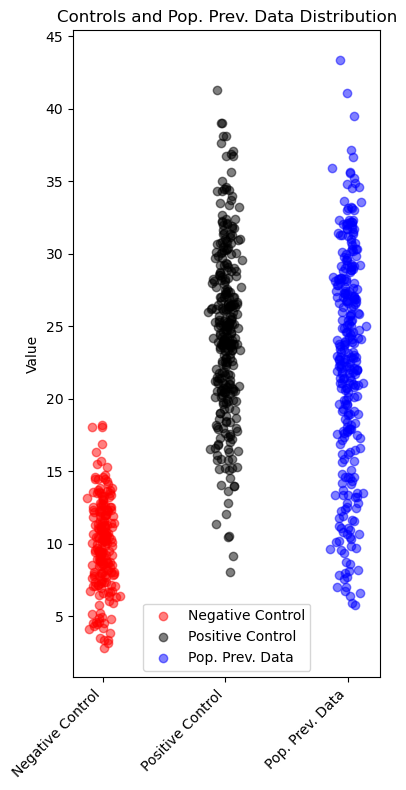

Optimal Youden cutoff c* = 14.827
Sensitivity(se) = 0.960
Specificity(sp) = 0.960
Raw prevalence phi = 0.809
Corrected prevalence theta = 0.836
Youden cutoff c = 14.827472969601908


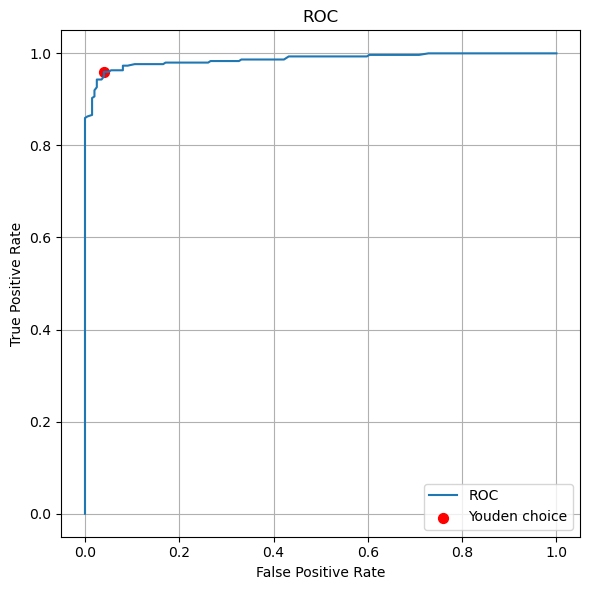

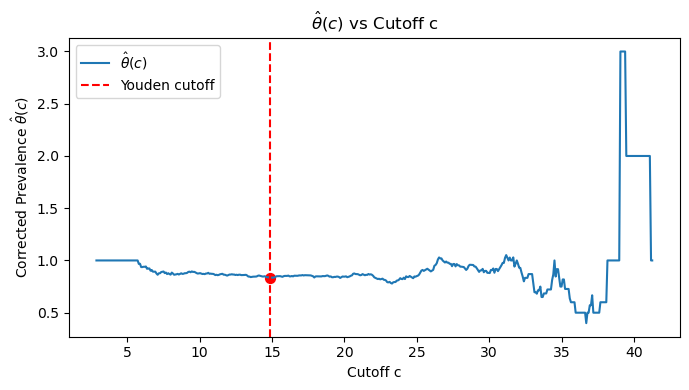

In [48]:
#3a,b

neg_path = Path("data/HW4_Q3_neg-1.csv")
pos_path = Path("data/HW4_Q3_pos-1.csv")
data_path = Path("data/HW4_Q3_data-1.csv")

pd_neg = pd.read_csv(neg_path)
pd_pos = pd.read_csv(pos_path)
pd_data = pd.read_csv(data_path)

def first_numeric_series(df):
    num_cols = df.select_dtypes(include=['float', 'int']).columns
    if len(num_cols) > 0:
        return df[num_cols[0]].dropna()
    # fallback: just take the first column
    return pd.to_numeric(df.iloc[:, 0], errors='coerce').dropna()

neg_series = first_numeric_series(pd_neg)
pos_series = first_numeric_series(pd_pos)
dat_series = first_numeric_series(pd_data)

neg_df  = pd.DataFrame({'type': 'Negative Control', 'value': neg_series.values})
pos_df  = pd.DataFrame({'type': 'Positive Control', 'value': pos_series.values})
data_df = pd.DataFrame({'type': 'Pop. Prev. Data',       'value': dat_series.values})

combined_df = pd.concat([neg_df, pos_df, data_df], ignore_index=True)

color_map = {
    'Negative Control': 'red',
    'Positive Control': 'black',
    'Pop. Prev. Data': 'blue'
}
x_positions = {
    'Negative Control': 0,
    'Positive Control': 1,
    'Pop. Prev. Data': 2
}

combined_df['x_jitter'] = combined_df['type'].map(x_positions) + np.random.normal(0, 0.05, len(combined_df))

plt.figure(figsize=(4, 8))
for t, color in color_map.items():
    subset = combined_df[combined_df['type'] == t]
    plt.scatter(subset['x_jitter'], subset['value'], alpha=0.5, color=color, label=t)

plt.xticks(list(x_positions.values()), list(x_positions.keys()), rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Controls and Pop. Prev. Data Distribution')
plt.legend()
plt.tight_layout()
plt.savefig("figs/3a.png")
plt.show()

#b 
neg_path = Path("data/HW4_Q3_neg-1.csv")
pos_path = Path("data/HW4_Q3_pos-1.csv")
data_path = Path("data/HW4_Q3_data-1.csv")

pd_neg = pd.read_csv(neg_path)
pd_pos = pd.read_csv(pos_path)
pd_data = pd.read_csv(data_path)

def first_numeric_series(df):
    num_cols = df.select_dtypes(include=['float', 'int']).columns
    if len(num_cols) > 0:
        return df[num_cols[0]].dropna()
    return pd.to_numeric(df.iloc[:, 0], errors='coerce').dropna()

neg_df  = pd.DataFrame({'value': first_numeric_series(pd_neg)})
pos_df  = pd.DataFrame({'value': first_numeric_series(pd_pos)})
data_df = pd.DataFrame({'value': first_numeric_series(pd_data)})

def se(c):
    return np.mean(pos_df["value"] > c)

def sp(c):
    return np.mean(neg_df["value"] < c)

def phi(c):
    return np.mean(data_df["value"] > c)

def theta(c):
    sen, spe, phihat = se(c), sp(c), phi(c)
    denom = sen + spe - 1
    return (phihat - (1 - spe)) / denom if denom != 0 else np.nan

possible_cutoffs = np.linspace(
    min(neg_df["value"].min(), pos_df["value"].min(), data_df["value"].min()),
    max(neg_df["value"].max(), pos_df["value"].max(), data_df["value"].max()),
    500
)

results = []
for c in possible_cutoffs:
    J = se(c) + sp(c) - 1
    results.append((c, se(c), sp(c), phi(c), theta(c), J))

results_df = pd.DataFrame(results, columns=["c", "se", "sp", "phi", "theta", "J"])

youden_row = results_df.loc[results_df["J"].idxmax()]
youden_c = youden_row["c"]

print(f"Optimal Youden cutoff c* = {youden_c:.3f}")
print(f"Sensitivity(se) = {youden_row['se']:.3f}")
print(f"Specificity(sp) = {youden_row['sp']:.3f}")
print(f"Raw prevalence phi = {youden_row['phi']:.3f}")
print(f"Corrected prevalence theta = {youden_row['theta']:.3f}")


#3c

possible_cutoffs = np.linspace(
    min(data_df["value"].min(), neg_df["value"].min(), pos_df["value"].min()),
    max(data_df["value"].max(), neg_df["value"].max(), pos_df["value"].max()),
    500
)

results = []
for c in possible_cutoffs:
    sen, spe, phihat, thetahat = se(c), sp(c), phi(c), theta(c)
    J = sen + spe - 1
    results.append((c, sen, spe, phihat, thetahat, J))

results_df = pd.DataFrame(results, columns=["c", "se", "sp", "phi", "theta", "J"])

youden_row = results_df.loc[results_df["J"].idxmax()]
youden_c = youden_row["c"]
print("Youden cutoff c =", youden_c)
# print(youden_row[["se", "sp", "phi", "theta"]])

plt.figure(figsize=(6,6))
plt.plot(1 - results_df["sp"], results_df["se"], label="ROC")
plt.scatter(1 - youden_row["sp"], youden_row["se"], color="red", s=50, label="Youden choice")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figs/3c1.png")
plt.show()

plt.figure(figsize=(7,4))
plt.plot(results_df["c"], results_df["theta"], label=r"$\hat{\theta}(c)$")
plt.axvline(youden_c, color="red", linestyle="--", label="Youden cutoff")
plt.scatter(youden_c, youden_row["theta"], color="red", s=50)
plt.xlabel("Cutoff c")
plt.ylabel(r"Corrected Prevalence $\hat{\theta}(c)$")
plt.title(r"$\hat{\theta}(c)$ vs Cutoff c")
plt.legend()
plt.tight_layout()
plt.savefig("figs/3c2.png")
plt.show()